In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd  
import statsmodels.api as sm 
plt.style.use('ggplot')

nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x ** 3))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

X = sm.add_constant(X)
y = np.dot(X, beta) + e

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.828e+08
Date:                Fri, 25 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:57:13   Log-Likelihood:                -144.23
No. Observations:                 100   AIC:                             294.5
Df Residuals:                      97   BIC:                             302.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6107      0.273      5.900      0.0

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

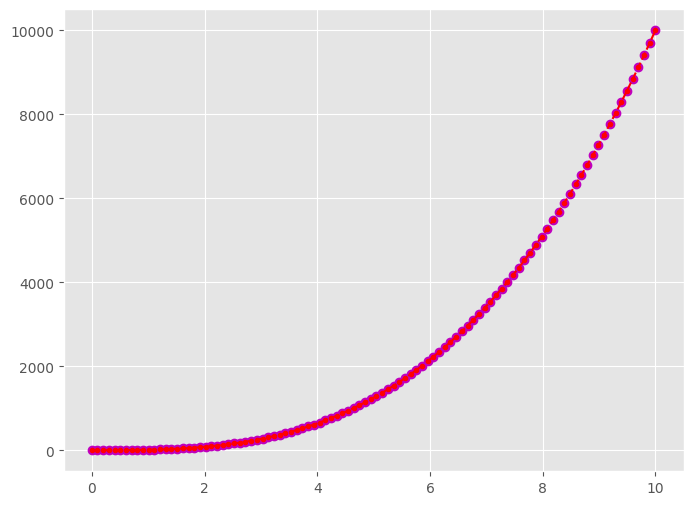

In [4]:
import matplotlib.pyplot as plt

pred_ols = results.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, y, "o", label="data", c='m')
ax.plot(x, results.fittedvalues, "r--.", label="OLS")
ax.plot(x, iv_u, "r--")
ax.plot(x, iv_l, "r--")
ax.legend(loc="best")
plt.show()